In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('C:/Users/HackXis/DSDA Project/Indian Liver Patient Dataset (ILPD).csv')

In [4]:
data.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [5]:
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
data.shape

(583, 11)

In [7]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [8]:
data.dtypes

age                   int64
gender               object
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumin               int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
is_patient            int64
dtype: object

In [9]:
data.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [10]:
data=data.drop_duplicates()

In [11]:
data.shape

(570, 11)

In [12]:
data['alkphos'].fillna(value=data['alkphos'].mean(),inplace=True)

In [13]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [14]:
data=pd.get_dummies(data)

In [15]:
data.shape

(570, 12)

In [16]:
data.columns

Index(['age', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins', 'albumin',
       'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient', 'gender_Female',
       'gender_Male'],
      dtype='object')

In [17]:
data.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Female,gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [18]:
data['is_patient'].value_counts()

1    406
2    164
Name: is_patient, dtype: int64

# K-Nearest Neighbors Classifier

In [19]:
x = data.drop(['is_patient'],axis=1)
y = data['is_patient']
x.shape,y.shape

((570, 11), (570,))

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
minmax = MinMaxScaler()

In [22]:
x_scaled=minmax.fit_transform(x)

In [23]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [24]:
x.shape

(570, 11)

In [25]:
x.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,gender_Female,gender_Male
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1.0,0.0
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0,1.0
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0,1.0
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0,1.0
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0,1.0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=56,stratify=y,test_size=0.3)

In [28]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [29]:
from sklearn.metrics import f1_score

In [30]:
# ELBOW CURVE FOR BEST VALUE OF K

In [73]:
def Elbow(K):
    test_error = []
    for i in K:
        clf=knn(n_neighbors=i)
        clf.fit(x_train,y_train)
        temp=clf.predict(x_test)
        temp=f1_score(temp,y_test)
        error = 1-temp
        test_error.append(error)
    return test_error

Text(0.5, 1.0, 'Elbow Curve for test')

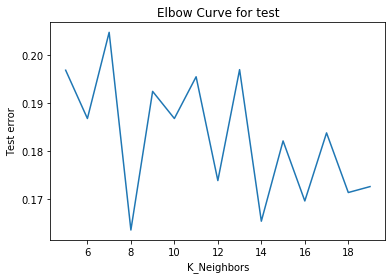

In [74]:
k = range(5,20,1)
test = Elbow(k)
plt.plot(k,test)
plt.xlabel('K_Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [33]:
model_knn = knn(n_neighbors=8)
model_knn.fit(x_train,y_train)
y_test_pred = model_knn.predict(x_test)
knn_res=y_test_pred
f1_score(y_test_pred,y_test)

0.8363636363636363

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [35]:
confusion_matrix(y_test_pred,y_test)

array([[115,  38],
       [  7,  11]], dtype=int64)

In [36]:
accuracy_score(y_test_pred,y_test)

0.7368421052631579

In [37]:
precision_score(y_test_pred,y_test)

0.9426229508196722

In [38]:
recall_score(y_test_pred,y_test)

0.7516339869281046

# Naive Bayes

In [39]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

In [40]:
gnb = BernoulliNB()

In [41]:
gnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [42]:
y_test_pred=gnb.predict(x_test)
naive_b_res=y_test_pred

In [43]:
accuracy_score(y_test_pred,y_test)

0.7192982456140351

In [44]:
confusion_matrix(y_test_pred,y_test)

array([[120,  46],
       [  2,   3]], dtype=int64)

In [45]:
precision_score(y_test_pred,y_test)

0.9836065573770492

In [46]:
recall_score(y_test_pred,y_test)

0.7228915662650602

# Random Forests

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=56)

In [48]:
clf.fit(x_train,y_train)

C:\Users\HackXis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=56, verbose=0,
                       warm_start=False)

In [49]:
clf.score(x_train, y_train)

0.9799498746867168

In [50]:
y_test_pred=clf.predict(x_test)
random_f_res=y_test_pred

In [51]:
accuracy_score(y_test_pred,y_test)

0.6900584795321637

In [52]:
confusion_matrix(y_test_pred,y_test)

array([[107,  38],
       [ 15,  11]], dtype=int64)

In [53]:
precision_score(y_test_pred,y_test)

0.8770491803278688

In [54]:
recall_score(y_test_pred,y_test)

0.7379310344827587

# Support Vector Machine

In [55]:
from sklearn.svm import LinearSVC
model=LinearSVC()
model.fit(x_train,y_train)
y_test_pred=model.predict(x_test)
svm_res=y_test_pred
accuracy_score(y_test_pred,y_test)

0.7076023391812866

In [56]:
confusion_matrix(y_test_pred,y_test)

array([[116,  44],
       [  6,   5]], dtype=int64)

In [57]:
precision_score(y_test_pred,y_test)

0.9508196721311475

In [58]:
recall_score(y_test_pred,y_test)

0.725

# Ensembled Result

In [59]:
from statistics import mode

In [60]:
final_pred=np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, mode([knn_res[i], naive_b_res[i], random_f_res[i],svm_res[i],1]))

In [61]:
accuracy_score(final_pred,y_test)

0.7192982456140351

In [62]:
confusion_matrix(final_pred,y_test)

array([[121,  47],
       [  1,   2]], dtype=int64)

In [63]:
precision_score(final_pred,y_test)

0.9918032786885246

In [64]:
recall_score(final_pred,y_test)

0.7202380952380952